In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14)

In [71]:
data=pd.read_csv(r'bank.csv',header=0)
data=data.dropna() #Удаление пропущенных данных
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [72]:
a=1000*(10-1) #N – номер студента по журналу ; chosen 10
data=data.iloc[a:a+10000,:]

In [73]:
data['education']=np.where(data['education'] =='basic.9y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y',
'Basic', data['education'])

In [74]:
from statistics import mean

# print(list(data.columns))
# data.groupby('y').mean()
# data.drop(data.columns[[0,11 и другие]], axis = 1, inplace = True) 

print(list(data.columns))
res = mean(data.y) 
print(res)

# columns_res = data.groupby('y').groups
# print(columns_res)

data.drop(data.columns[[2, 5, 7,13]], axis = 1, inplace = True) 
data.head()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
0.1154


,age,job,education,default,loan,month,day_of_week,duration,campaign,pdays,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
9000,35,blue-collar,high.school,no,no,may,thu,121,1,999,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0
9001,35,blue-collar,Basic,no,yes,may,wed,433,3,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9002,56,housemaid,Basic,unknown,no,may,mon,86,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9003,39,admin.,professional.course,no,no,aug,fri,306,3,999,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
9004,53,admin.,university.degree,no,no,aug,mon,67,3,999,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0


['age', 'job', 'education', 'default', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


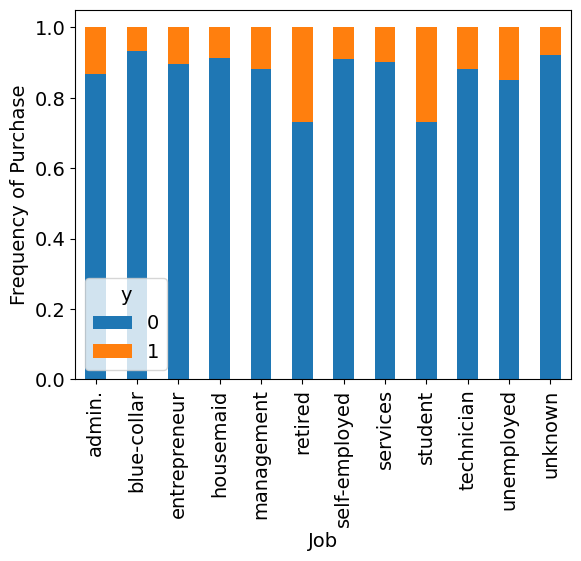

In [75]:
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))
# data.drop(data.columns[[0,11 и другие]], axis = 1, inplace = True)

In [76]:
data = pd.get_dummies(data, columns =['job', 'education', 'day_of_week', 'poutcome']) 

In [77]:
print(list(data.columns))
data.drop(data.columns[[16]], axis = 1, inplace = True) 

['age', 'default', 'loan', 'month', 'duration', 'campaign', 'pdays', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [87]:
X = data.loc[:, data.columns != 'y']
Y = data.loc[:, data.columns == 'y']
Y = Y['y']

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
random_state=0)
print(X_train.shape)

(7500, 37)


In [95]:
logreg = LogisticRegression(solver='lbfgs',random_state=0)
print(X_train)
print(Y_train)
# logreg.fit(X_train,Y_train) 

       age  default loan month  duration  campaign  pdays  emp_var_rate  \
11967   27       no  yes   may       194         2    999           1.1   
9700    35       no   no   nov       226         1    999          -0.1   
12481   32  unknown  yes   may       535         2    999           1.1   
10621   30       no  yes   may       691         5    999           1.1   
9800    57       no   no   jul       305         1    999           1.4   
...    ...      ...  ...   ...       ...       ...    ...           ...   
18225   28       no   no   oct       317         2    999          -3.4   
13859   46       no  yes   apr       285         5    999          -1.8   
12264   72       no   no   aug       270         1    999          -2.9   
18845   59       no   no   apr       247         2    999          -1.8   
11732   48  unknown   no   aug       229         2    999           1.4   

       cons_price_idx  cons_conf_idx  ...  education_university.degree  \
11967          93.994    

In [96]:
predicted_y = logreg.predict(X_test)
predicted_y
print('Accuracy: {:.4f}'.format(logreg.score(X_test, Y_test))) 

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.